In [11]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.pyplot import specgram
from keras import regularizers
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Activation, Dropout, Flatten, Dense, Input, BatchNormalization
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from librosa.util import lazy
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [13]:
# Function to extract text from .docx file

def extract_text_from_docx(docx_path):
    doc = Document(docx_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

In [14]:
# Specify your file path
file_path = 'Data/Alice.docx'  # or 'Data/alice_in_wonderland.txt'

In [15]:
# Determine file type and read accordingly
if file_path.endswith('.txt'):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            texts = file.readlines()
    else:
        print(f"File not found: {file_path}")
elif file_path.endswith('.docx'):
    if os.path.exists(file_path):
        texts = extract_text_from_docx(file_path).split('\n')
    else:
        print(f"File not found: {file_path}")
else:
    print("Unsupported file format")

Streamlit Integration Example

If you plan to integrate this with Streamlit for file uploads:

python

import streamlit as st

def extract_text_from_docx(docx_file):
    from docx import Document
    doc = Document(docx_file)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

uploaded_file = st.file_uploader("Choose a file", type=["txt", "docx"])

if uploaded_file is not None:
    if uploaded_file.type == "text/plain":
        texts = uploaded_file.getvalue().decode("utf-8").splitlines()
    elif uploaded_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        texts = extract_text_from_docx(uploaded_file).split('\n')
    
    # Further processing like tokenization and padding can be done here
    st.write(texts)

In [16]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
max_length = max(len(seq) for seq in sequences)

data = pad_sequences(sequences, maxlen=max_length)

In [17]:
#binary classification would be applied.)
labels = np.random.randint(2, size=(len(texts), 1))

In [18]:
# Split data into training and validation sets
train_size = int(len(data) * 0.8)
x_train, x_val = data[:train_size], data[train_size:]
y_train, y_val = labels[:train_size], labels[train_size:]

In [19]:
# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4979 - loss: 0.6945 - val_accuracy: 0.5042 - val_loss: 0.6930
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5709 - loss: 0.6811 - val_accuracy: 0.4931 - val_loss: 0.6984
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7174 - loss: 0.5877 - val_accuracy: 0.5069 - val_loss: 0.7720
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8263 - loss: 0.3649 - val_accuracy: 0.5014 - val_loss: 0.9526


In [22]:
# Evaluate the Model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 0.6928
Validation Loss: 0.6929948329925537
Validation Accuracy: 0.5041666626930237


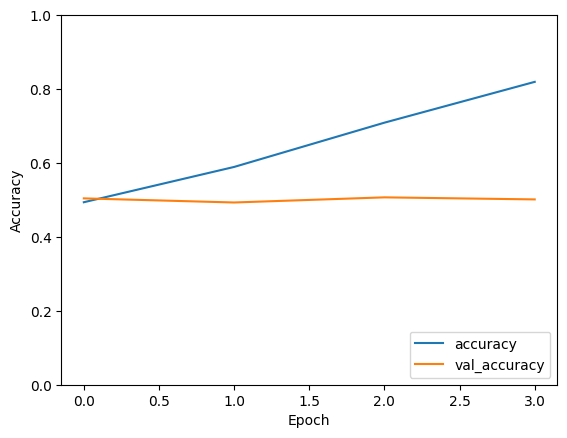

In [23]:
# Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [24]:
predictions = 

SyntaxError: invalid syntax (2296651794.py, line 1)